In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np

in_f = 10000



data_ST_list = []
for i in range(10):
    cc = np.loadtxt('disease_ST_svd_'+str(i)+'.txt')
    data_ST_list.append(cc)


data_ST_list = np.array(data_ST_list)
data_ST = np.resize(data_ST_list,(5000,10000))

data_ST_ = []
for i in range(data_ST.shape[0]):
    data_ST_.append(data_ST[i][0:in_f])

data_ST_ = np.array(data_ST_)


del data_ST, data_ST_list





data_SB_list = []
for i in range(10):
    cc = np.loadtxt('disease_SB_svd_'+str(i)+'.txt')
    data_SB_list.append(cc)


data_SB_list = np.array(data_SB_list)
data_SB = np.resize(data_SB_list,(5000,10000))

data_SB_ = []
for i in range(data_SB.shape[0]):
    data_SB_.append(data_SB[i][0:in_f])

data_SB_ = np.array(data_SB_)


del data_SB, data_SB_list




data_SR_list = []
for i in range(10):
    cc = np.loadtxt('disease_SR_svd_'+str(i)+'.txt')
    data_SR_list.append(cc)


data_SR_list = np.array(data_SR_list)
data_SR = np.resize(data_SR_list,(5000,10000))

data_SR_ = []
for i in range(data_SR.shape[0]):
    data_SR_.append(data_SR[i][0:in_f])

data_SR_ = np.array(data_SR_)


del data_SR, data_SR_list



data_ST_train = []
data_SR_train = []
data_SB_train = []

for i in range(2500):
    data_SB_train.append(data_SB_[i])
    data_SR_train.append(data_SR_[i])
    data_ST_train.append(data_ST_[i])



data_ST_test = []
data_SR_test = []
data_SB_test = []

for i in range(3000,4000):
    data_SB_test.append(data_SB_[i])
    data_SR_test.append(data_SR_[i])
    data_ST_test.append(data_ST_[i])


data_train = data_SB_train + data_SR_train + data_ST_train
data_test = data_SB_test + data_SR_test + data_ST_test


del data_SB_train, data_SR_train, data_ST_train
del data_SB_test, data_SR_test, data_ST_test



label_train = []
for i in range(2500):
    label_train.append(0)

for i in range(2500):
    label_train.append(1)

for i in range(2500):
    label_train.append(2)

label_train = np.array(label_train)

label_test = []
for i in range(1000):
    label_test.append(0)

for i in range(1000):
    label_test.append(1)

for i in range(1000):
    label_test.append(2)

label_test = torch.tensor(label_test)





In [2]:
data_train = torch.FloatTensor(data_train)
label_train = torch.LongTensor(label_train)

data_test = torch.FloatTensor(data_test)

/tmp/ipykernel_27880/775766362.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  data_train = torch.FloatTensor(data_train)


In [3]:
class Model(nn.Module):
  def __init__(self, in_features= 10000 , h1= 64  , h2= 64 ,
                h3 = 64 , h4 = 32, h5 = 18,
                    out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.fc4 = nn.Linear(h3, h4)
    self.fc5 = nn.Linear(h4, h5)


    self.out = nn.Linear(h5, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))


    x = self.out(x)

    return x


torch.manual_seed(42)
model = Model()


In [4]:


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 1000
# epochs = 100
losses = []
validation_losses = []
for i in range(epochs):
    y_pred = model.forward(data_train) 

    loss = criterion(y_pred, label_train) 

    # Evaluate Model on Test Data Set (validate model on test set)
    with torch.no_grad():  # Basically turn off back propogation
        y_eval = model.forward(data_test) # X_test are features from our test set, y_eval will be predictions
        validation_loss = criterion(y_eval, label_test) # Find the loss or error
        validation_losses.append(validation_loss.detach().numpy().item())



    losses.append(loss.detach().numpy().item())

    if i % 100 == 0:
        print(f'Epoch: {i} and loss: {loss} validation loss : {validation_loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()





Epoch: 0 and loss: 1.0999009609222412 validation loss : 1.099900722503662
Epoch: 100 and loss: 0.008038381114602089 validation loss : 1.7633901834487915
Epoch: 200 and loss: 0.0035895288456231356 validation loss : 2.5063257217407227
Epoch: 300 and loss: 0.002983990591019392 validation loss : 2.7298495769500732
Epoch: 400 and loss: 0.002932957373559475 validation loss : 2.8925423622131348
Epoch: 500 and loss: 0.16364091634750366 validation loss : 1.2228699922561646
Epoch: 600 and loss: 0.023211397230625153 validation loss : 2.4457876682281494
Epoch: 700 and loss: 0.011900587938725948 validation loss : 3.541123151779175
Epoch: 800 and loss: 0.011167922057211399 validation loss : 3.770784854888916
Epoch: 900 and loss: 0.01048324629664421 validation loss : 3.9417707920074463


In [5]:
y_eval.dtype

torch.float32

In [6]:
losses = np.array(losses)
np.savetxt('loss_model_.txt', losses)

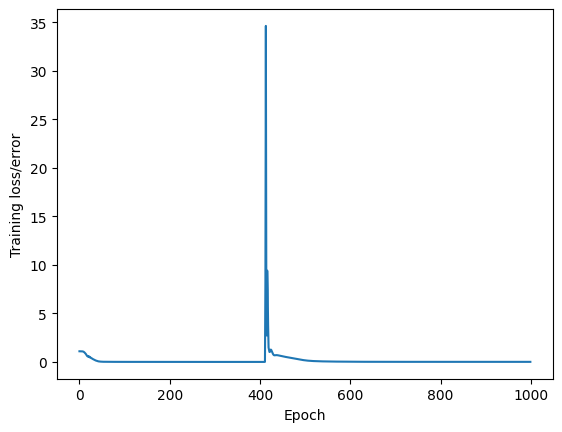

In [7]:
plt.plot(range(epochs), losses)
plt.ylabel("Training loss/error")
plt.xlabel('Epoch')
plt.savefig('training_loss.png')

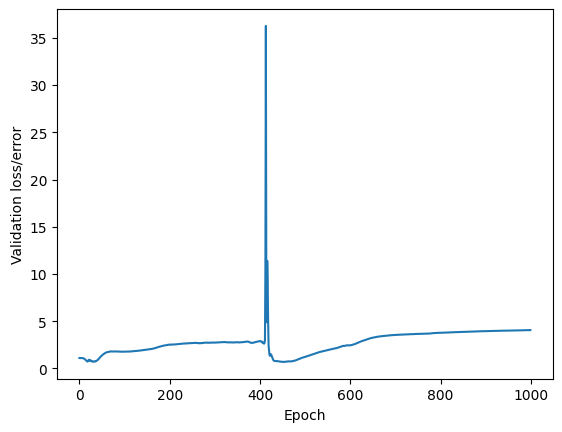

In [8]:
plt.plot(range(epochs), validation_losses)
plt.ylabel("Validation loss/error")
plt.xlabel('Epoch')



plt.savefig('validation_loss.png')